In [1]:
import tabix
YRI_file = "./data/YRI.low_coverage.2010_09.genotypes.vcf.gz"
yri = tabix.Tabix(YRI_file)

In [2]:
import tabix
import pandas as pd

In [3]:
rs3094315 = yri.query("1", 752566, 752567)
for record in rs3094315:
    print(record)

In [4]:
import pandas as pd

ann = pd.read_table('./data/genome_Hong_ChangBum_v2_Full_20190106202606.txt', 
                               comment='#', names=['rsid', 'chrom', 'pos', 'genotype'], low_memory=False)
print("The 23andMe datset has {} rows and {} columns.".format(ann.shape[0], ann.shape[1]))
ann.head()

The 23andMe datset has 546557 rows and 4 columns.


,rsid,chrom,pos,genotype
0,rs3094315,1,752566,AA
1,rs3934834,1,1005806,CC
2,rs9442372,1,1018704,GG
3,rs3737728,1,1021415,GG
4,rs11260588,1,1021658,GG


In [5]:
ann.shape

(546557, 4)

In [6]:
#anon = ann[(ann.chrom == "22")]
ann.head()

,rsid,chrom,pos,genotype
0,rs3094315,1,752566,AA
1,rs3934834,1,1005806,CC
2,rs9442372,1,1018704,GG
3,rs3737728,1,1021415,GG
4,rs11260588,1,1021658,GG


In [7]:
ann.shape

(546557, 4)

In [8]:
def convert_anon_genotype(chrom, pos, genotype, vcf_tabix):
    try:
        site = vcf_tabix.query(chrom, pos - 1, pos)
    except:
        return None
    
    ref=''
    alt=''

    for row in site:
        
        ref = row[3]
        alt = row[4]
        #print("%s-%s %s %s %s"%(chrom,pos,genotype,ref,alt))
        if genotype == ref+ref:
            return("0|0")
        elif (genotype == ref+alt) | (genotype == alt+ref):
            return("0|1")
        elif genotype == alt+alt:
            return("1|1")
        else:
            return("0|0")

In [44]:
genotypes_1kg_format = []
for chrom, pos, genotype in zip(ann['chrom'], ann['pos'], ann['genotype']):
    genotypes_1kg_format.append(convert_anon_genotype(str(chrom), pos, genotype, yri))
    
ann['genotype_1kg_format'] = genotypes_1kg_format

In [10]:
#ann

In [11]:
#print(ann.shape)

## 참조 인구 집단 데이터 만들기

In [12]:
yri_genotypes = pd.DataFrame({"population": "YRI","sample": ["YRI" + str(i) for i in range(1, 60)]})
yri_genotypes.head()

,population,sample
0,YRI,YRI1
1,YRI,YRI2
2,YRI,YRI3
3,YRI,YRI4
4,YRI,YRI5


In [13]:
def extract_genotype(chrom, pos, vcf_tabix):    
    g = ''
    try:
        site = vcf_tabix.query(chrom, pos - 1, pos)
        for row in site:
            #print(row)
            g = row[9:]
            g = [i.split(":")[0] for i in g]
            return(g)
    except:
        return None

## CEU & CHBJPT

In [14]:
YRI_file = "./data/YRI.low_coverage.2010_09.genotypes.vcf.gz"
yri = tabix.Tabix(YRI_file)
rs3094315 = yri.query("22", 49549881, 49549882)
for record in rs3094315:
    number_yri_samples = len(record[9:])
    print(len(record[9:]))
yri_genotypes = pd.DataFrame({"population": "YRI","sample": ["YRI" + str(i) for i in range(1, number_yri_samples + 1)]})
yri_genotypes

59


,population,sample
0,YRI,YRI1
1,YRI,YRI2
2,YRI,YRI3
3,YRI,YRI4
4,YRI,YRI5
5,YRI,YRI6
6,YRI,YRI7
7,YRI,YRI8
8,YRI,YRI9
9,YRI,YRI10


In [15]:
CEU_file = "./data/CEU.low_coverage.2010_09.genotypes.vcf.gz"
ceu = tabix.Tabix(CEU_file)
rs3094315 = ceu.query("22", 49549881, 49549882)
for record in rs3094315:
    number_ceu_samples = len(record[9:])
    print(len(record[9:]))
ceu_genotypes = pd.DataFrame({"population": "CEU","sample": ["CEU" + str(i) for i in range(1, number_ceu_samples + 1)]})
ceu_genotypes

60


,population,sample
0,CEU,CEU1
1,CEU,CEU2
2,CEU,CEU3
3,CEU,CEU4
4,CEU,CEU5
5,CEU,CEU6
6,CEU,CEU7
7,CEU,CEU8
8,CEU,CEU9
9,CEU,CEU10


In [16]:
CHBJPT_file = "./data/CHBJPT.low_coverage.2010_09.genotypes.vcf.gz"
chbjpt = tabix.Tabix(CHBJPT_file)
rs3094315 = ceu.query("22", 49549881, 49549882)
for record in rs3094315:
    number_chbjpt_samples = len(record[9:])
    print(len(record[9:]))
chbjpt_genotypes = pd.DataFrame({"population": "CHBJPT", "sample": ["CHBJPT" + str(i) for i in range(1, number_chbjpt_samples + 1)]})
chbjpt_genotypes


60


,population,sample
0,CHBJPT,CHBJPT1
1,CHBJPT,CHBJPT2
2,CHBJPT,CHBJPT3
3,CHBJPT,CHBJPT4
4,CHBJPT,CHBJPT5
5,CHBJPT,CHBJPT6
6,CHBJPT,CHBJPT7
7,CHBJPT,CHBJPT8
8,CHBJPT,CHBJPT9
9,CHBJPT,CHBJPT10


In [17]:
#yri_genotypes=yri_genotypes.iloc[0:10, 0:7]
#ceu_genotypes=ceu_genotypes.iloc[0:10, 0:7]
#chbjpt_genotypes=chbjpt_genotypes.iloc[0:10, 0:7]

In [18]:
for rsid, chrom, pos in zip(ann['rsid'], ann['chrom'], ann['pos']):
    #print("%s-%s-%s"%(rsid,pos,j))
    #j = j + 1
    g = extract_genotype(str(chrom), pos, ceu)
    
    if g != None:
        ceu_genotypes[rsid] = g

In [19]:
for rsid, chrom, pos in zip(ann['rsid'], ann['chrom'], ann['pos']):
    #print("%s-%s-%s"%(rsid,pos,j))
    #j = j + 1
    g = extract_genotype(str(chrom), pos, chbjpt)
    
    if g != None:
        chbjpt_genotypes[rsid] = g

In [20]:
for rsid, chrom, pos in zip(ann['rsid'], ann['chrom'], ann['pos']):
    #print("%s-%s-%s"%(rsid,pos,j))
    #j = j + 1
    g = extract_genotype(str(chrom), pos, yri)
    if g != None:
        yri_genotypes[rsid] = g

In [21]:
#for rsid, chrom, pos in zip(ann['rsid'], ann['chrom'], ann['pos']):
#    yri_genotypes[rsid] =  extract_genotype(str(chrom), pos, yri)
#    ceu_genotypes[rsid] =  extract_genotype(str(chrom), pos, ceu)
#    chbjpt_genotypes[rsid] =  extract_genotype(str(chrom), pos, chbjpt)

In [22]:
print("The dataframe including all of the samples from the YRI population has {} samples and {} genotypes.".format(yri_genotypes.shape[0], yri_genotypes.shape[1] - 2))
yri_genotypes

The dataframe including all of the samples from the YRI population has 59 samples and 2277 genotypes.


,population,sample,rs1869970,rs1538693,rs868689,rs17407901,rs12039710,rs10799257,rs938962,rs11120831,...,rs11704836,rs878734,rs2269668,rs7286402,rs932381,rs3827389,rs3747226,rs9626899,rs8139696,rs4823779
0,YRI,YRI1,0|0,0|0,0|0,0|1,0|0,1|1,0|0,0|0,...,0|0,1|0,0|0,0|0,0|0,0|0,1|1,0|0,0|0,0|0
1,YRI,YRI2,0|0,0|0,1|1,0|1,1|0,0|1,0|0,0|0,...,0|0,1|1,0|0,0|1,0|0,0|0,0|1,0|0,0|0,1|1
2,YRI,YRI3,0|0,0|0,0|0,0|1,0|1,1|0,1|0,1|0,...,0|0,0|0,1|0,0|1,0|0,0|1,0|0,0|0,0|1,1|0
3,YRI,YRI4,0|0,0|0,0|1,0|1,1|0,0|1,0|1,0|1,...,0|0,1|1,0|0,0|1,0|0,0|0,1|1,0|0,0|0,1|1
4,YRI,YRI5,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,...,0|0,1|0,0|0,0|0,0|0,0|0,0|0,1|0,0|1,0|0
5,YRI,YRI6,0|0,0|0,0|1,0|0,0|0,1|1,0|1,0|0,...,0|0,1|1,0|0,0|0,0|0,0|0,1|1,0|0,0|0,1|0
6,YRI,YRI7,0|0,0|0,0|1,0|0,0|0,0|0,0|1,0|0,...,0|0,1|0,0|1,1|0,0|0,0|0,0|1,0|0,0|0,1|0
7,YRI,YRI8,0|0,0|0,0|0,0|0,0|0,1|1,0|0,0|0,...,1|0,0|0,0|0,1|1,0|0,0|0,1|0,0|0,0|0,0|0
8,YRI,YRI9,0|0,0|0,0|0,0|1,0|0,0|0,0|0,0|0,...,0|0,0|1,0|0,0|0,0|0,1|0,0|1,0|0,0|0,1|1
9,YRI,YRI10,0|0,0|1,0|0,0|0,0|0,0|0,0|0,0|0,...,0|0,1|1,0|0,1|1,0|0,0|0,1|1,0|0,0|0,0|0


In [23]:
#ceu_genotypes=ceu_genotypes.iloc[0:10, 0:7]
print("The dataframe including all of the samples from the CEU population has {} samples and {} genotypes.".format(yri_genotypes.shape[0], ceu_genotypes.shape[1] - 2))

ceu_genotypes

The dataframe including all of the samples from the CEU population has 59 samples and 1705 genotypes.


,population,sample,rs2643901,rs868689,rs12093951,rs12039710,rs10799257,rs938962,rs35802556,rs7535209,...,rs738276,rs11704836,rs878734,rs7286402,rs2285108,rs3935378,rs3747226,rs9626899,rs8139696,rs1884698
0,CEU,CEU1,0|0,0|0,1|0,0|0,0|0,1|0,0|0,0|0,...,1|1,0|1,0|0,0|0,0|0,0|0,1|1,0|0,0|0,1|0
1,CEU,CEU2,0|0,0|1,0|0,0|0,0|0,0|1,0|0,0|0,...,1|1,0|0,0|0,0|0,0|0,0|0,0|1,0|0,0|0,0|0
2,CEU,CEU3,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,...,0|1,1|0,0|0,0|0,0|0,0|0,0|1,0|0,1|0,0|0
3,CEU,CEU4,0|0,0|0,0|0,0|1,0|0,0|0,0|0,0|0,...,0|1,0|1,0|0,0|0,0|0,0|0,1|1,0|0,0|1,0|1
4,CEU,CEU5,0|0,0|0,0|1,0|0,1|1,1|0,0|0,0|0,...,1|1,0|1,0|0,0|0,0|0,0|0,1|1,0|0,0|0,0|0
5,CEU,CEU6,0|0,0|0,0|0,0|0,1|0,0|0,0|0,0/1,...,1|1,1|1,0|0,0|0,0|0,0|0,1|1,0|0,1|0,0|0
6,CEU,CEU7,0|0,0|0,0|1,0|0,0|0,0|0,0|0,0|0,...,1|1,0|0,0|0,0|0,0|0,0|0,1|1,0|0,1|0,1|0
7,CEU,CEU8,0|0,0|0,0|0,0|0,1|0,0|0,0|0,0|0,...,1|1,0|0,1|0,0|0,0|0,0|1,1|1,1|0,0|0,1|0
8,CEU,CEU9,0|0,1|0,0|0,0|0,1|0,0|0,0|0,0|0,...,1|0,0|0,0|0,0|0,0|0,0|0,0|1,0|0,0|0,0|0
9,CEU,CEU10,0|0,0|1,0|0,0|0,0|1,0|1,0|0,0|0,...,1|1,0|0,0|1,0|0,0|0,0|0,1|0,0|0,0|1,1|0


In [24]:
print("The dataframe including all of the samples from the CHBJPT population has {} samples and {} genotypes.".format(chbjpt_genotypes.shape[0], chbjpt_genotypes.shape[1] - 2))
chbjpt_genotypes

The dataframe including all of the samples from the CHBJPT population has 60 samples and 1368 genotypes.


,population,sample,rs868689,rs12093951,rs17407901,rs12039710,rs938962,rs4908635,rs1193231,rs6663564,...,rs5996153,rs7287569,rs738276,rs11704836,rs7286402,rs3747226,rs6519866,rs8139696,rs5767974,rs1884698
0,CHBJPT,CHBJPT1,0|0,0|0,0|0,0|0,1|0,0|0,0|0,1|1,...,1|0,1|1,1|1,1|1,1|1,1|1,0|0,0|0,0|0,0|1
1,CHBJPT,CHBJPT2,0|0,0|0,0|1,0|0,0|1,0|0,0|0,0|1,...,1|1,1|1,1|1,0|0,1|0,1|1,0|0,1|0,0|0,0|0
2,CHBJPT,CHBJPT3,0|0,1|0,0|0,0|0,1|0,0|0,0|0,1|1,...,1|1,1|1,1|1,1|1,0|0,1|1,0|0,1|1,0|0,0|0
3,CHBJPT,CHBJPT4,0|1,0|0,0|0,1|0,0|0,0|0,0|0,0|0,...,1|1,1|1,1|1,1|1,1|0,1|1,1|0,1|0,0|1,0|0
4,CHBJPT,CHBJPT5,0|0,0|0,1|0,0|0,1|0,0|0,0|0,0|0,...,1|1,1|1,1|1,1|0,0|0,1|1,0|0,0|0,0|0,1|0
5,CHBJPT,CHBJPT6,0|0,0|0,0|0,0|0,0|0,0|0,0|0,1|1,...,1|1,1|1,1|1,1|1,0|1,1|1,0|1,1|0,0|1,0|0
6,CHBJPT,CHBJPT7,0|0,0|1,1|0,1|0,1|1,0|0,0|0,0|0,...,1|1,1|1,1|1,1|1,0|0,1|1,0|0,0|0,0|1,0|0
7,CHBJPT,CHBJPT8,0|0,0|0,0|0,0|0,1|0,0|0,0|0,0|1,...,1|1,1|1,1|1,1|0,0|0,1|1,1|0,0|1,0|0,1|1
8,CHBJPT,CHBJPT9,0|0,0|0,1|0,0|0,1|0,1|0,0|0,0|0,...,1|0,1|0,1|1,1|1,0|0,1|1,0|0,0|0,0|0,0|0
9,CHBJPT,CHBJPT10,0|1,0|0,0|0,0|0,1|1,0|0,0|0,1|0,...,1|1,1|0,1|0,0|1,0|0,0|1,0|0,0|0,0|0,1|0


In [25]:
ceu_genotypes.shape

(60, 1707)

In [26]:
yri_genotypes.shape

(59, 2279)

In [27]:
chbjpt_genotypes.shape

(60, 1370)

In [28]:
genotypes = ceu_genotypes.copy()
genotypes

,population,sample,rs2643901,rs868689,rs12093951,rs12039710,rs10799257,rs938962,rs35802556,rs7535209,...,rs738276,rs11704836,rs878734,rs7286402,rs2285108,rs3935378,rs3747226,rs9626899,rs8139696,rs1884698
0,CEU,CEU1,0|0,0|0,1|0,0|0,0|0,1|0,0|0,0|0,...,1|1,0|1,0|0,0|0,0|0,0|0,1|1,0|0,0|0,1|0
1,CEU,CEU2,0|0,0|1,0|0,0|0,0|0,0|1,0|0,0|0,...,1|1,0|0,0|0,0|0,0|0,0|0,0|1,0|0,0|0,0|0
2,CEU,CEU3,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,...,0|1,1|0,0|0,0|0,0|0,0|0,0|1,0|0,1|0,0|0
3,CEU,CEU4,0|0,0|0,0|0,0|1,0|0,0|0,0|0,0|0,...,0|1,0|1,0|0,0|0,0|0,0|0,1|1,0|0,0|1,0|1
4,CEU,CEU5,0|0,0|0,0|1,0|0,1|1,1|0,0|0,0|0,...,1|1,0|1,0|0,0|0,0|0,0|0,1|1,0|0,0|0,0|0
5,CEU,CEU6,0|0,0|0,0|0,0|0,1|0,0|0,0|0,0/1,...,1|1,1|1,0|0,0|0,0|0,0|0,1|1,0|0,1|0,0|0
6,CEU,CEU7,0|0,0|0,0|1,0|0,0|0,0|0,0|0,0|0,...,1|1,0|0,0|0,0|0,0|0,0|0,1|1,0|0,1|0,1|0
7,CEU,CEU8,0|0,0|0,0|0,0|0,1|0,0|0,0|0,0|0,...,1|1,0|0,1|0,0|0,0|0,0|1,1|1,1|0,0|0,1|0
8,CEU,CEU9,0|0,1|0,0|0,0|0,1|0,0|0,0|0,0|0,...,1|0,0|0,0|0,0|0,0|0,0|0,0|1,0|0,0|0,0|0
9,CEU,CEU10,0|0,0|1,0|0,0|0,0|1,0|1,0|0,0|0,...,1|1,0|0,0|1,0|0,0|0,0|0,1|0,0|0,0|1,1|0


In [29]:
#genotypes = genotypes.append(yri_genotypes, ignore_index=True)
genotypes = genotypes.append(yri_genotypes,sort=True, ignore_index=True)
genotypes = genotypes.reindex(yri_genotypes.columns,axis=1)
genotypes
#genotypes = genotypes.append(chbjpt_genotypes, ignore_index=True)

,population,sample,rs1869970,rs1538693,rs868689,rs17407901,rs12039710,rs10799257,rs938962,rs11120831,...,rs11704836,rs878734,rs2269668,rs7286402,rs932381,rs3827389,rs3747226,rs9626899,rs8139696,rs4823779
0,CEU,CEU1,NaN,NaN,0|0,NaN,0|0,0|0,1|0,NaN,...,0|1,0|0,NaN,0|0,NaN,NaN,1|1,0|0,0|0,NaN
1,CEU,CEU2,NaN,NaN,0|1,NaN,0|0,0|0,0|1,NaN,...,0|0,0|0,NaN,0|0,NaN,NaN,0|1,0|0,0|0,NaN
2,CEU,CEU3,NaN,NaN,0|0,NaN,0|0,0|0,0|0,NaN,...,1|0,0|0,NaN,0|0,NaN,NaN,0|1,0|0,1|0,NaN
3,CEU,CEU4,NaN,NaN,0|0,NaN,0|1,0|0,0|0,NaN,...,0|1,0|0,NaN,0|0,NaN,NaN,1|1,0|0,0|1,NaN
4,CEU,CEU5,NaN,NaN,0|0,NaN,0|0,1|1,1|0,NaN,...,0|1,0|0,NaN,0|0,NaN,NaN,1|1,0|0,0|0,NaN
5,CEU,CEU6,NaN,NaN,0|0,NaN,0|0,1|0,0|0,NaN,...,1|1,0|0,NaN,0|0,NaN,NaN,1|1,0|0,1|0,NaN
6,CEU,CEU7,NaN,NaN,0|0,NaN,0|0,0|0,0|0,NaN,...,0|0,0|0,NaN,0|0,NaN,NaN,1|1,0|0,1|0,NaN
7,CEU,CEU8,NaN,NaN,0|0,NaN,0|0,1|0,0|0,NaN,...,0|0,1|0,NaN,0|0,NaN,NaN,1|1,1|0,0|0,NaN
8,CEU,CEU9,NaN,NaN,1|0,NaN,0|0,1|0,0|0,NaN,...,0|0,0|0,NaN,0|0,NaN,NaN,0|1,0|0,0|0,NaN
9,CEU,CEU10,NaN,NaN,0|1,NaN,0|0,0|1,0|1,NaN,...,0|0,0|1,NaN,0|0,NaN,NaN,1|0,0|0,0|1,NaN


In [30]:
genotypes = genotypes.append(chbjpt_genotypes, sort=True, ignore_index=True)
genotypes = genotypes.reindex(yri_genotypes.columns,axis=1)
genotypes

,population,sample,rs1869970,rs1538693,rs868689,rs17407901,rs12039710,rs10799257,rs938962,rs11120831,...,rs11704836,rs878734,rs2269668,rs7286402,rs932381,rs3827389,rs3747226,rs9626899,rs8139696,rs4823779
0,CEU,CEU1,NaN,NaN,0|0,NaN,0|0,0|0,1|0,NaN,...,0|1,0|0,NaN,0|0,NaN,NaN,1|1,0|0,0|0,NaN
1,CEU,CEU2,NaN,NaN,0|1,NaN,0|0,0|0,0|1,NaN,...,0|0,0|0,NaN,0|0,NaN,NaN,0|1,0|0,0|0,NaN
2,CEU,CEU3,NaN,NaN,0|0,NaN,0|0,0|0,0|0,NaN,...,1|0,0|0,NaN,0|0,NaN,NaN,0|1,0|0,1|0,NaN
3,CEU,CEU4,NaN,NaN,0|0,NaN,0|1,0|0,0|0,NaN,...,0|1,0|0,NaN,0|0,NaN,NaN,1|1,0|0,0|1,NaN
4,CEU,CEU5,NaN,NaN,0|0,NaN,0|0,1|1,1|0,NaN,...,0|1,0|0,NaN,0|0,NaN,NaN,1|1,0|0,0|0,NaN
5,CEU,CEU6,NaN,NaN,0|0,NaN,0|0,1|0,0|0,NaN,...,1|1,0|0,NaN,0|0,NaN,NaN,1|1,0|0,1|0,NaN
6,CEU,CEU7,NaN,NaN,0|0,NaN,0|0,0|0,0|0,NaN,...,0|0,0|0,NaN,0|0,NaN,NaN,1|1,0|0,1|0,NaN
7,CEU,CEU8,NaN,NaN,0|0,NaN,0|0,1|0,0|0,NaN,...,0|0,1|0,NaN,0|0,NaN,NaN,1|1,1|0,0|0,NaN
8,CEU,CEU9,NaN,NaN,1|0,NaN,0|0,1|0,0|0,NaN,...,0|0,0|0,NaN,0|0,NaN,NaN,0|1,0|0,0|0,NaN
9,CEU,CEU10,NaN,NaN,0|1,NaN,0|0,0|1,0|1,NaN,...,0|0,0|1,NaN,0|0,NaN,NaN,1|0,0|0,0|1,NaN


In [31]:
print("Now the genotypes data frame has %s samples and %s genotypes"%(genotypes.shape[0], genotypes.shape[1]-2))

Now the genotypes data frame has 179 samples and 2277 genotypes


In [32]:
#

## PCA

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)

genotypes_only = genotypes.copy().iloc[:, 2:]
genotypes_only[genotypes_only == "1|1"] = 1
genotypes_only[genotypes_only == "0|1"] = 0.5
genotypes_only[genotypes_only == "0/1"] = 0.5
genotypes_only[genotypes_only == "1|0"] = 0.5
genotypes_only[genotypes_only == "0|0"] = 0.0

In [34]:
genotypes_only

,rs1869970,rs1538693,rs868689,rs17407901,rs12039710,rs10799257,rs938962,rs11120831,rs1011124,rs12082271,...,rs11704836,rs878734,rs2269668,rs7286402,rs932381,rs3827389,rs3747226,rs9626899,rs8139696,rs4823779
0,NaN,NaN,0,NaN,0,0,0.5,NaN,NaN,NaN,...,0.5,0,NaN,0,NaN,NaN,1,0,0,NaN
1,NaN,NaN,0.5,NaN,0,0,0.5,NaN,NaN,NaN,...,0,0,NaN,0,NaN,NaN,0.5,0,0,NaN
2,NaN,NaN,0,NaN,0,0,0,NaN,NaN,NaN,...,0.5,0,NaN,0,NaN,NaN,0.5,0,0.5,NaN
3,NaN,NaN,0,NaN,0.5,0,0,NaN,NaN,NaN,...,0.5,0,NaN,0,NaN,NaN,1,0,0.5,NaN
4,NaN,NaN,0,NaN,0,1,0.5,NaN,NaN,NaN,...,0.5,0,NaN,0,NaN,NaN,1,0,0,NaN
5,NaN,NaN,0,NaN,0,0.5,0,NaN,NaN,NaN,...,1,0,NaN,0,NaN,NaN,1,0,0.5,NaN
6,NaN,NaN,0,NaN,0,0,0,NaN,NaN,NaN,...,0,0,NaN,0,NaN,NaN,1,0,0.5,NaN
7,NaN,NaN,0,NaN,0,0.5,0,NaN,NaN,NaN,...,0,0.5,NaN,0,NaN,NaN,1,0.5,0,NaN
8,NaN,NaN,0.5,NaN,0,0.5,0,NaN,NaN,NaN,...,0,0,NaN,0,NaN,NaN,0.5,0,0,NaN
9,NaN,NaN,0.5,NaN,0,0.5,0.5,NaN,NaN,NaN,...,0,0.5,NaN,0,NaN,NaN,0.5,0,0.5,NaN


In [35]:
# 지노타입 정보가 없는 경우 삭제한다.
genotypes_only = genotypes_only.dropna(axis=1)
genotypes_only

,rs868689,rs12039710,rs938962,rs2187942,rs804134,rs2235789,rs2454160,rs109490,rs3795686,i6061370,...,rs5997602,rs17722172,rs736210,rs1056680,rs7287569,rs738276,rs11704836,rs7286402,rs3747226,rs8139696
0,0,0,0.5,0,0,1,0.5,0,0.5,0.5,...,0,0.5,0,0.5,0,1,0.5,0,1,0
1,0.5,0,0.5,0.5,0.5,0,0.5,0,0.5,0.5,...,0,0.5,0,0,1,1,0,0,0.5,0
2,0,0,0,0,0.5,0,0.5,0,0,0,...,0,1,0,1,0,0.5,0.5,0,0.5,0.5
3,0,0.5,0,0,0.5,0,0,0.5,0,0,...,0,0.5,0,0.5,0.5,0.5,0.5,0,1,0.5
4,0,0,0.5,0,0.5,0,0.5,0,0,0,...,0,0.5,0,0.5,0.5,1,0.5,0,1,0
5,0,0,0,0,0.5,0,0.5,0,0.5,0.5,...,0.5,0.5,1,0,1,1,1,0,1,0.5
6,0,0,0,0,0,0.5,0,0,0.5,0.5,...,0,1,0,0,0,1,0,0,1,0.5
7,0,0,0,0,0.5,0.5,0,0.5,0.5,0.5,...,0.5,0.5,0,0.5,0.5,1,0,0,1,0
8,0.5,0,0,0,0.5,0,0.5,0.5,0,0,...,0.5,1,0,1,0.5,0.5,0,0,0.5,0
9,0.5,0,0.5,0,0,1,0,0.5,0.5,0.5,...,0,1,0,0,0.5,1,0,0,0.5,0.5


In [36]:
print("Now the genotypes data frame has %s samples and %s genotypes"%(genotypes_only.shape[0], genotypes_only.shape[1]-2))

Now the genotypes data frame has 179 samples and 963 genotypes


In [37]:
new_df=genotypes_only[genotypes_only.columns[1:12]]
new_df

,rs12039710,rs938962,rs2187942,rs804134,rs2235789,rs2454160,rs109490,rs3795686,i6061370,rs515781,rs489676
0,0,0.5,0,0,1,0.5,0,0.5,0.5,1,0.5
1,0,0.5,0.5,0.5,0,0.5,0,0.5,0.5,1,0
2,0,0,0,0.5,0,0.5,0,0,0,1,0.5
3,0.5,0,0,0.5,0,0,0.5,0,0,1,0.5
4,0,0.5,0,0.5,0,0.5,0,0,0,1,1
5,0,0,0,0.5,0,0.5,0,0.5,0.5,1,0.5
6,0,0,0,0,0.5,0,0,0.5,0.5,1,0
7,0,0,0,0.5,0.5,0,0.5,0.5,0.5,1,0
8,0,0,0,0.5,0,0.5,0.5,0,0,1,0.5
9,0,0.5,0,0,1,0,0.5,0.5,0.5,1,0


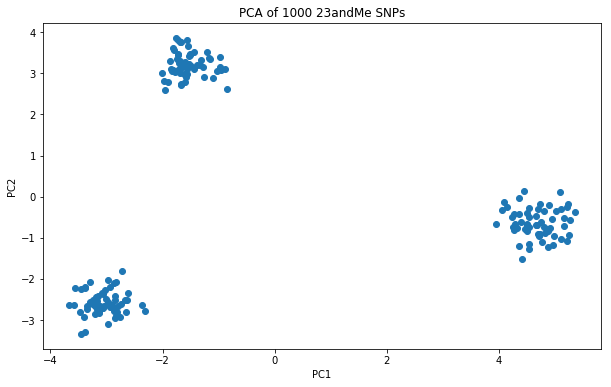

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

#pca.fit(new_df)
#pc = pca.transform(new_df)
pca.fit(genotypes_only)
pc = pca.transform(genotypes_only)

plt.figure(figsize=(10,6))
plt.scatter(pc[:, 0], pc[:, 1])
plt.title('PCA of 1000 23andMe SNPs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

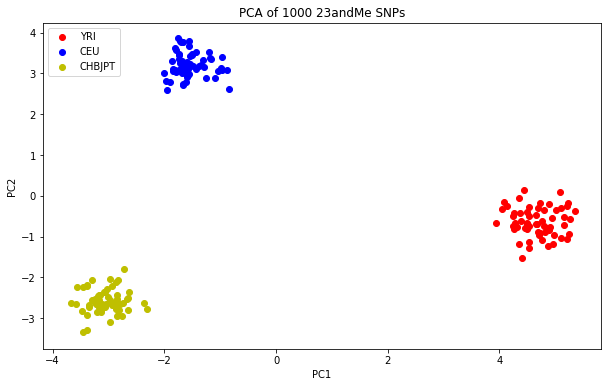

In [39]:
import numpy as np

plt.figure(figsize=(10,6))

for c, pop in zip("rby", ["YRI", "CEU", "CHBJPT"]):
    plt.scatter(pc[np.where(genotypes['population'] == pop), 0], pc[np.where(genotypes['population'] == pop), 1], c = c, label = pop)
plt.title('PCA of 1000 23andMe SNPs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'upper left')
plt.show()

## Merge 23andMe 

In [45]:
ann = ann.loc[ann['rsid'].isin(genotypes_only.columns.values), :]
ann_genotypes = ann.copy()["genotype_1kg_format"]
ann

,rsid,chrom,pos,genotype,genotype_1kg_format
311,rs868689,1,3301130,GT,0|0
615,rs12039710,1,4581338,CC,1|1
852,rs938962,1,5283942,CT,0|0
2591,rs2187942,1,14459141,CT,0|1
2742,rs804134,1,15150914,TT,0|0
2836,rs2235789,1,15442058,CT,0|1
3112,rs2454160,1,17485653,AC,0|0
3420,rs109490,1,18572901,AG,0|0
5004,rs3795686,1,26582091,AG,0|0
5005,i6061370,1,26582091,AG,0|0


In [46]:
ann_genotypes[ann_genotypes == "1|1"] = 1
ann_genotypes[ann_genotypes == "0|1"] = 0.5
ann_genotypes[ann_genotypes == "1|0"] = 0.5
ann_genotypes[ann_genotypes == "0|0"] = 0.0
type(ann_genotypes)
#anon_genotypes
#ann_genotypes = ann_genotypes.reshape(1,-1)

#anon_pca = pca.transform(anon_genotypes)

pandas.core.series.Series

In [47]:
#type(ann_genotypes)
ann_genotypes
#anon_pca = pca.transform(ann_genotypes)
ann_genotypes = ann_genotypes.as_matrix().reshape(1,-1)
#anon_pca = pca.transform(ann_genotypes)

/Users/hongchangbum/miniconda2/envs/hail/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [48]:
anon_pca = pca.transform(ann_genotypes)

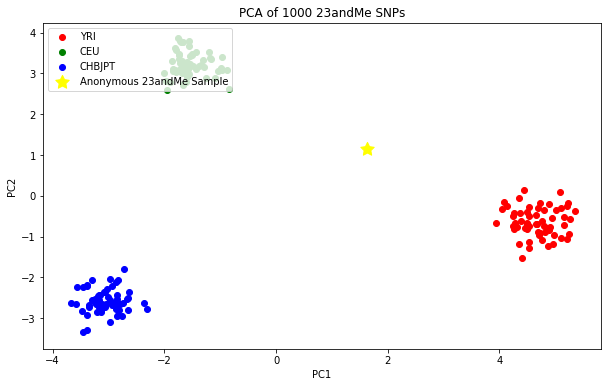

In [49]:
plt.figure(figsize=(10,6))
    
for c, pop in zip("rgb", ["YRI", "CEU", "CHBJPT"]):
    plt.scatter(pc[np.where(genotypes['population'] == pop), 0], pc[np.where(genotypes['population'] == pop), 1], c = c, label = pop)
    
# take the code above and add in the anonymous sample
    
plt.scatter(anon_pca[0,0], anon_pca[0,1], c = "yellow", label = "Anonymous 23andMe Sample", marker = (5,1,0), s = 200)
    
plt.title('PCA of 1000 23andMe SNPs')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc = 'upper left')
plt.show()